In [1]:
import os
import json
import re
import glob
from collections import defaultdict

import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [3]:
results_json = json.load(open('/home/Nele/code/ct_classifier_zoops/runs/Jan21_14-55-37_cv4e-2026-student4/val_predictions/val_predictions_epoch_00147.json'))
results_json.keys()
gt = results_json['labels']
predictions = results_json['predictions']
confidences = results_json['confidences']
labels = np.unique(gt)
labels.sort()
precision = precision_score(gt, predictions, labels=labels, average=None, zero_division=0)
recall = recall_score(gt, predictions, labels=labels, average=None, zero_division=0)


In [4]:
results_json['confidences']

[0.9090126752853394,
 0.8449496626853943,
 0.49724113941192627,
 0.46954771876335144,
 0.7679132223129272,
 0.6118937730789185,
 0.4816303551197052,
 0.4094061255455017,
 0.2376537173986435,
 0.9100797176361084,
 0.4408842623233795,
 0.8127005100250244,
 0.972055971622467,
 0.6880517601966858,
 0.872408390045166,
 0.9952895641326904,
 0.8840618133544922,
 0.6734448075294495,
 0.7237833738327026,
 0.7254303097724915,
 0.8010318279266357,
 0.7611522078514099,
 0.9981185793876648,
 0.9999755620956421,
 0.9819382429122925,
 0.5217378735542297,
 0.8032264709472656,
 0.9573703408241272,
 0.866439938545227,
 0.9746928215026855,
 0.9737589359283447,
 0.9990599751472473,
 0.9694069623947144,
 0.880596935749054,
 0.8604695200920105,
 0.9963009357452393,
 0.9227782487869263,
 0.9509665369987488,
 0.9024716019630432,
 0.9976170063018799,
 0.999366819858551,
 0.9994912147521973,
 0.9967051148414612,
 0.8760597109794617,
 0.48159778118133545,
 0.9076521992683411,
 0.9997732043266296,
 0.966981709003

Text(0.5, 0, 'class label')

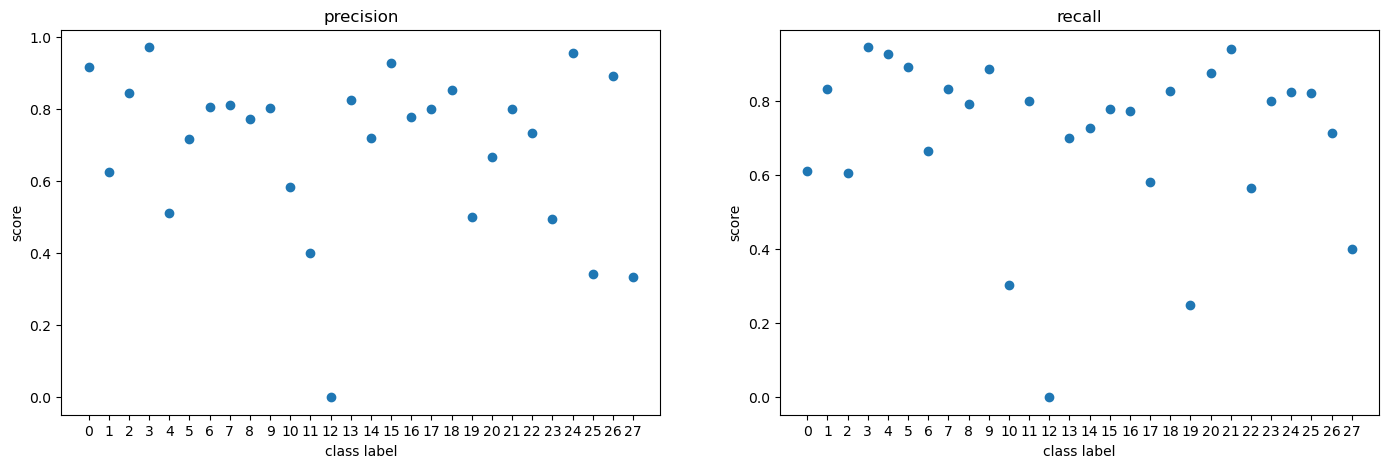

In [5]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1) 
plt.scatter(labels,precision,label='precision')
plt.xticks(labels)
plt.title('precision')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter(labels,recall,label='recall')
plt.xticks(labels)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('class label')

Text(0.5, 0, 'class label')

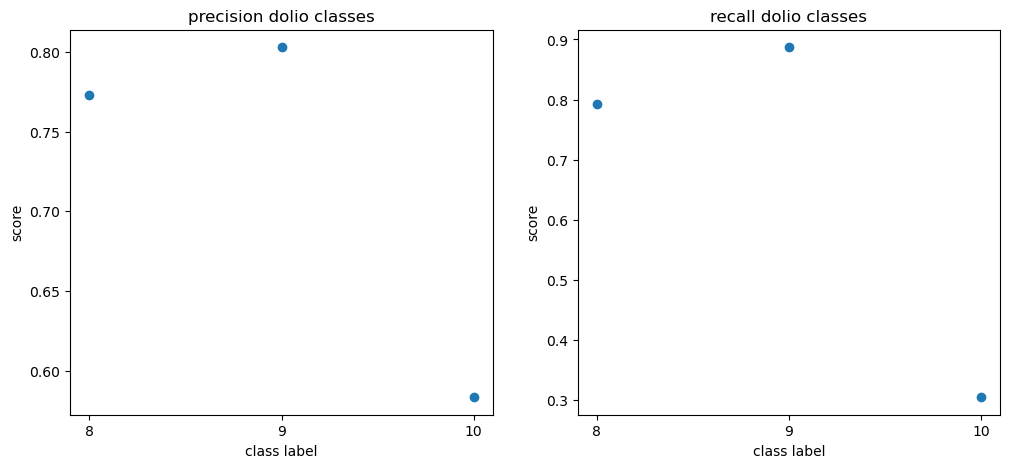

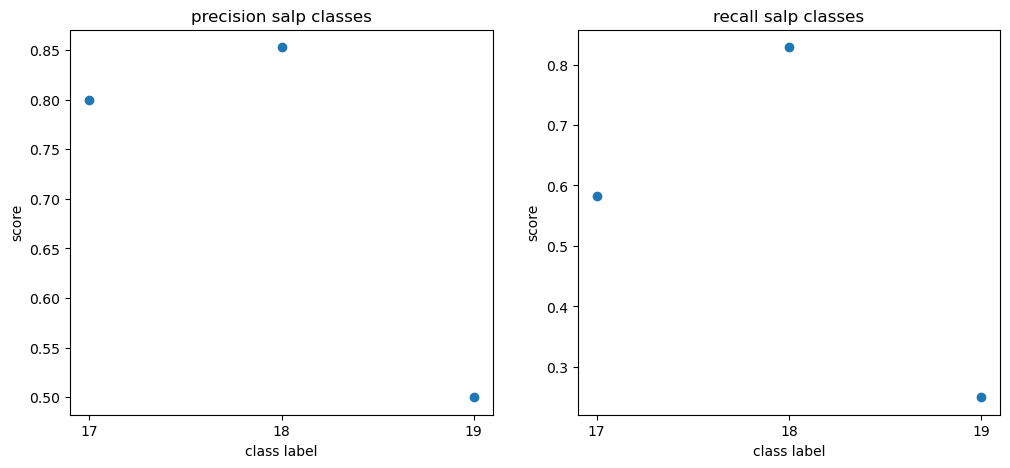

In [6]:
# # look at classes 
#     "dolio": 8,
#     "dolnurse": 9,
#     "dolphor": 10,
# separately

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.scatter([8,9,10],precision[[8,9,10]],label='precision')
plt.xticks([8,9,10])
plt.title('precision dolio classes')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter([8,9,10],recall[[8,9,10]],label='recall')
plt.xticks([8,9,10])
plt.title('recall dolio classes')
plt.ylabel('score')
plt.xlabel('class label')

# # look at classes 
#     "salp": 17,
#     "salpchain": 18,
#     "salpring": 19,
# separately

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.scatter([17,18,19],precision[[17,18,19]],label='precision')
plt.xticks([17,18,19])
plt.title('precision salp classes')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter([17,18,19],recall[[17,18,19]],label='recall')
plt.xticks([17,18,19])
plt.title('recall salp classes')
plt.ylabel('score')
plt.xlabel('class label')
    

In [7]:
#translate_labels = {8:28, 9:28,10:28, 17:29, 18:29, 19:29}
translate_labels = {17:28, 18:28, 19:28}
gt_translated = np.array([translate_labels[label] if label in translate_labels.keys() else label for label in gt])
pred_translated = np.array([translate_labels[label] if label in translate_labels.keys() else label for label in predictions])
labels_translated = np.unique(gt_translated)
labels_translated.sort()
precision = precision_score(gt_translated, pred_translated, labels=labels_translated, average=None, zero_division=0)
recall = recall_score(gt_translated, pred_translated, labels=labels_translated, average=None, zero_division=0)

In [8]:
np.unique(np.array(gt)),np.unique(np.array(gt_translated))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        20, 21, 22, 23, 24, 25, 26, 27, 28]))

Text(0.5, 0, 'class label')

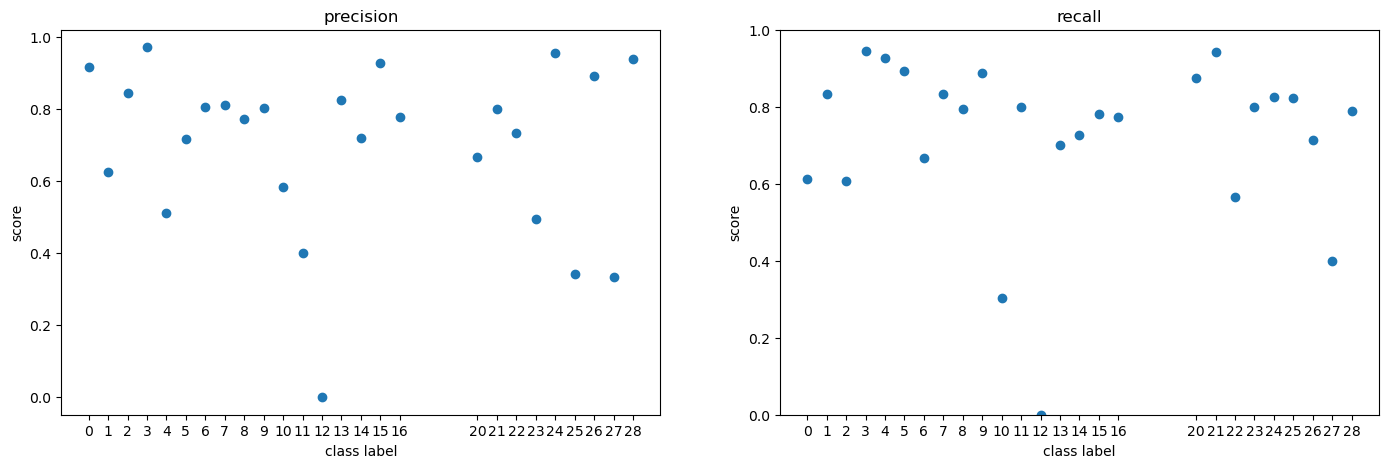

In [9]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1) 
plt.scatter(labels_translated,precision,label='precision')
plt.xticks(labels_translated)
plt.title('precision')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter(labels_translated,recall,label='recall')
plt.xticks(labels_translated)
plt.ylim(0, 1)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('class label')

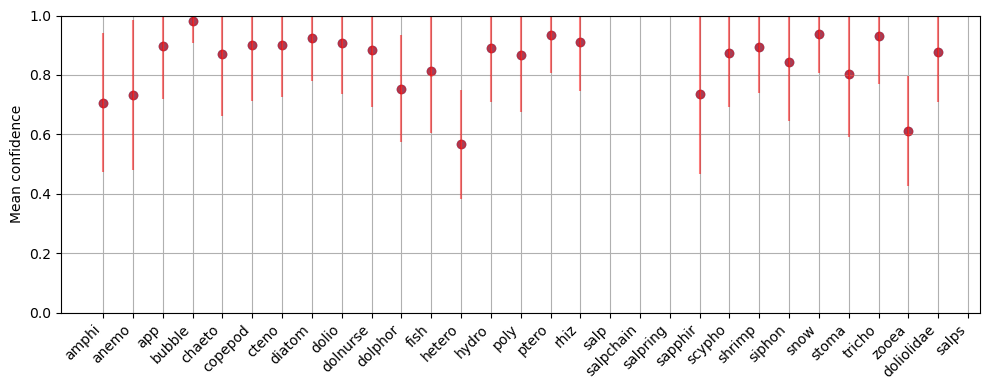

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Mean confidence for each true class
conf_arr = np.array(confidences)
pred = np.array(pred_translated)
category_dict = json.load(open("/home/Nele/code/scripts/DataPrep_Classifier/category_dict.json", 'r'))
inverse_category_dict = {v: k for k, v in category_dict.items()}
inverse_category_dict[28] = "doliolidae"
inverse_category_dict[29] = "salps"
class_ids = sorted(inverse_category_dict.keys())
class_names = [inverse_category_dict[c] for c in class_ids]
mean_conf_true = [conf_arr[pred == c].mean() if (pred == c).any() else np.nan for c in class_ids]
std_conf_true = [conf_arr[pred == c].std() if (pred == c).any() else np.nan for c in class_ids]

plt.figure(figsize=(10, 4))
plt.scatter(class_ids, mean_conf_true, color="steelblue")
plt.errorbar(class_names, mean_conf_true, yerr=std_conf_true, fmt="o", color="red", alpha=0.5)
#plt.title(f"Mean confidence by class ep:{ep_num_str}")
plt.ylabel("Mean confidence")
plt.xticks(rotation=45, ha="right")
#plt.title(f"Mean confidence by class ep:{ep_num_str}")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.grid(axis="x")
plt.tight_layout()
plt.show()